# Generating the Painbow Color Gradient from XKCD
> Generating the highly controvertial color map in Python and Matplotlib
- toc: true
- branch: master
- author: Michael Hotaling
- badges: true
- comments: true
- categories: [jupyter, visualizations, matplotlib,python]
- hide: false
- image: images/painbow_award.png
- show_image: true
- permalink: /painbow/
- hide_binder_badge: true
- hide_colab_badge: true

![](images/painbow_award.png)

In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd
import PIL

The painbow is a color gradient created by Randall Munroe created as a joke attempt to break every rule about visual designs. The gradient features multiple uses of the same colors of green along with having varying rates of change within itself which can lead to false edges when using it for plotting.

We can recreate this evil color scale with some custom matplotlib functions. 

In [2]:
def make_colormap(seq):
    seq = [(None,) * 3, 0.0] + list(seq) + [1.0, (None,) * 3]
    cdict = {'red': [], 'green': [], 'blue': []}
    for i, item in enumerate(seq):
        if isinstance(item, float):
            r1, g1, b1 = seq[i - 1]
            r2, g2, b2 = seq[i + 1]
            cdict['red'].append([item, r1, r2])
            cdict['green'].append([item, g1, g2])
            cdict['blue'].append([item, b1, b2])
    return mcolors.LinearSegmentedColormap('CustomMap', cdict)


c = mcolors.ColorConverter().to_rgb
painbow = make_colormap(
        [c('#ffffff'), c('#ffffff'), 0.02,  # white to white
         c('#ffffff'), c('#000000'), 0.15,  # white to black
         c('#000000'), c('#5c6889'), 0.25,  # black to gray
         c('#5c6889'), c('#1f7c61'), 0.30,  # gray to green
         c('#1f7c61'), c('#ff0000'), 0.35,  # green to red
         c('#ff0000'), c("#0bc21d"), 0.75,  # red to light green
         c("#0bc21d"), c("#cbf26e"), 0.90,  # light green to yellow
         c('#cbf26e'), c("#e7e9e1"), 1 ,    # yellow to white
         c('#e7e9e1')])            

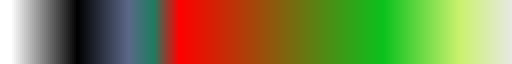

In [3]:
painbow

By reverse engineering the comics image using a scripted lookup table, we can plot Randall's plot as well as compare it against some other commonly used gradients to see how they compare

In [4]:
Z = pd.read_csv('data/painbow_data.csv').values

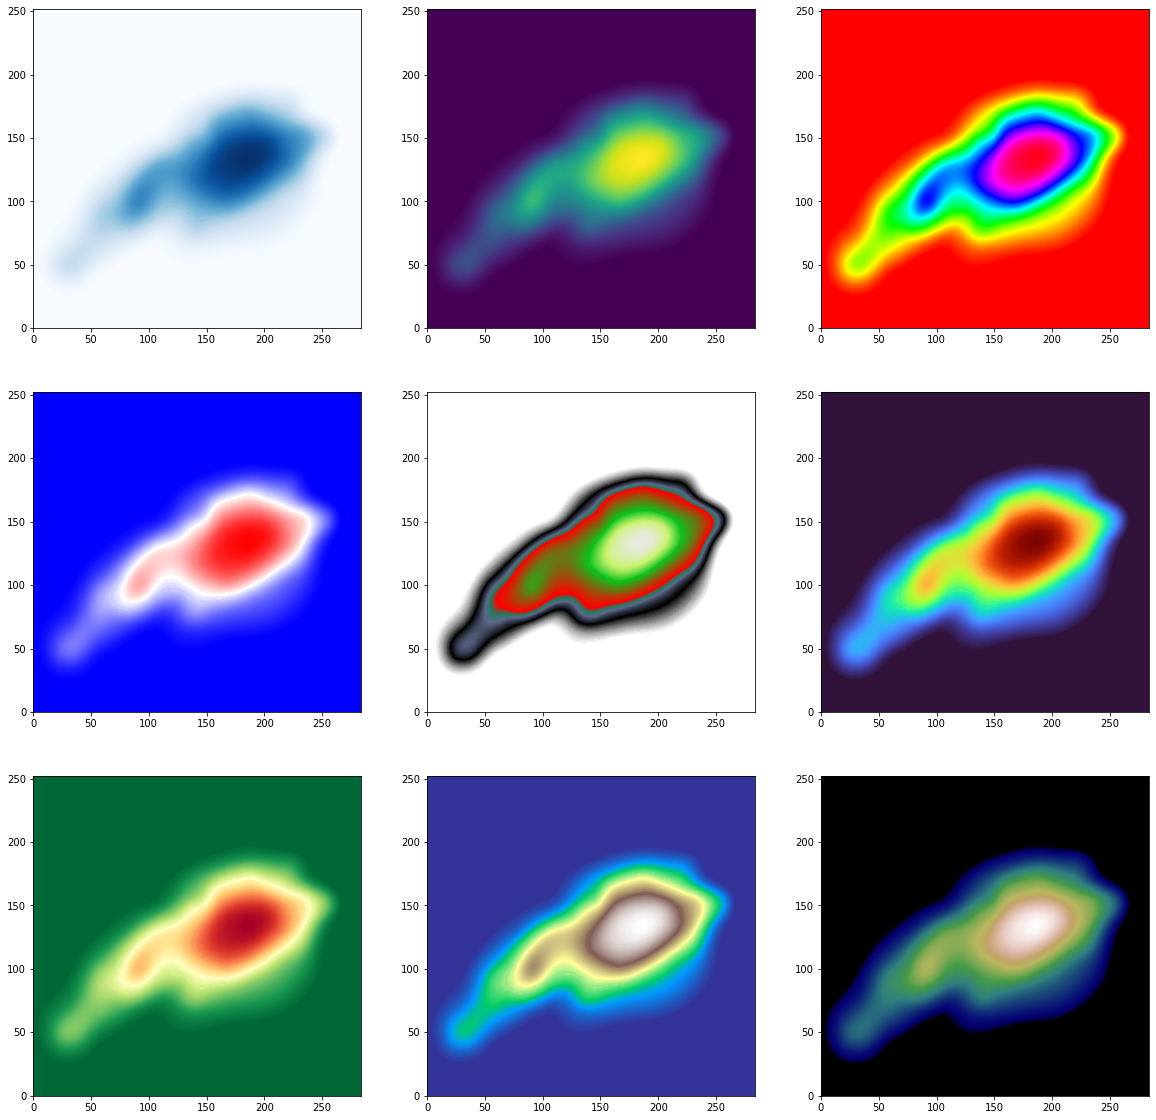

In [5]:
fig, axs = plt.subplots(3,3, figsize=(20,20))
axs[0,0].contourf(range(Z.shape[1]), range(Z.shape[0]), Z, 500, cmap = 'Blues')
axs[0,1].contourf(range(Z.shape[1]), range(Z.shape[0]), Z, 500, cmap = 'viridis')
axs[0,2].contourf(range(Z.shape[1]), range(Z.shape[0]), Z, 500, cmap = 'hsv')
axs[1,0].contourf(range(Z.shape[1]), range(Z.shape[0]), Z, 500, cmap = 'bwr')
axs[1,1].contourf(range(Z.shape[1]), range(Z.shape[0]), Z, 500, cmap = painbow)
axs[1,2].contourf(range(Z.shape[1]), range(Z.shape[0]), Z, 500, cmap = 'turbo')
axs[2,0].contourf(range(Z.shape[1]), range(Z.shape[0]), Z, 500, cmap = 'RdYlGn_r')
axs[2,1].contourf(range(Z.shape[1]), range(Z.shape[0]), Z, 500, cmap = 'terrain')
axs[2,2].contourf(range(Z.shape[1]), range(Z.shape[0]), Z, 500, cmap = 'gist_earth');

One of the only advantages of using the painbow would be to locate anomalies within data at low points. Since the colormap has varying rates of change, it can help locate variations in data much more effectively than other color maps. 

In [6]:
from scipy.stats import norm
def f(x,y):
    z = - np.sin(x/16) - np.cos(y/16)
    # Adding an anomaly
    z = z - norm.pdf(x = np.sqrt((x-0.75*512)**2 + (y-0.33*512)**2)/512*20)
    return z
    
x = np.linspace(0, 512, 1000)
y = np.linspace(0, 512, 1000)
X, Y = np.meshgrid(x, y)
Z = f(X,Y)

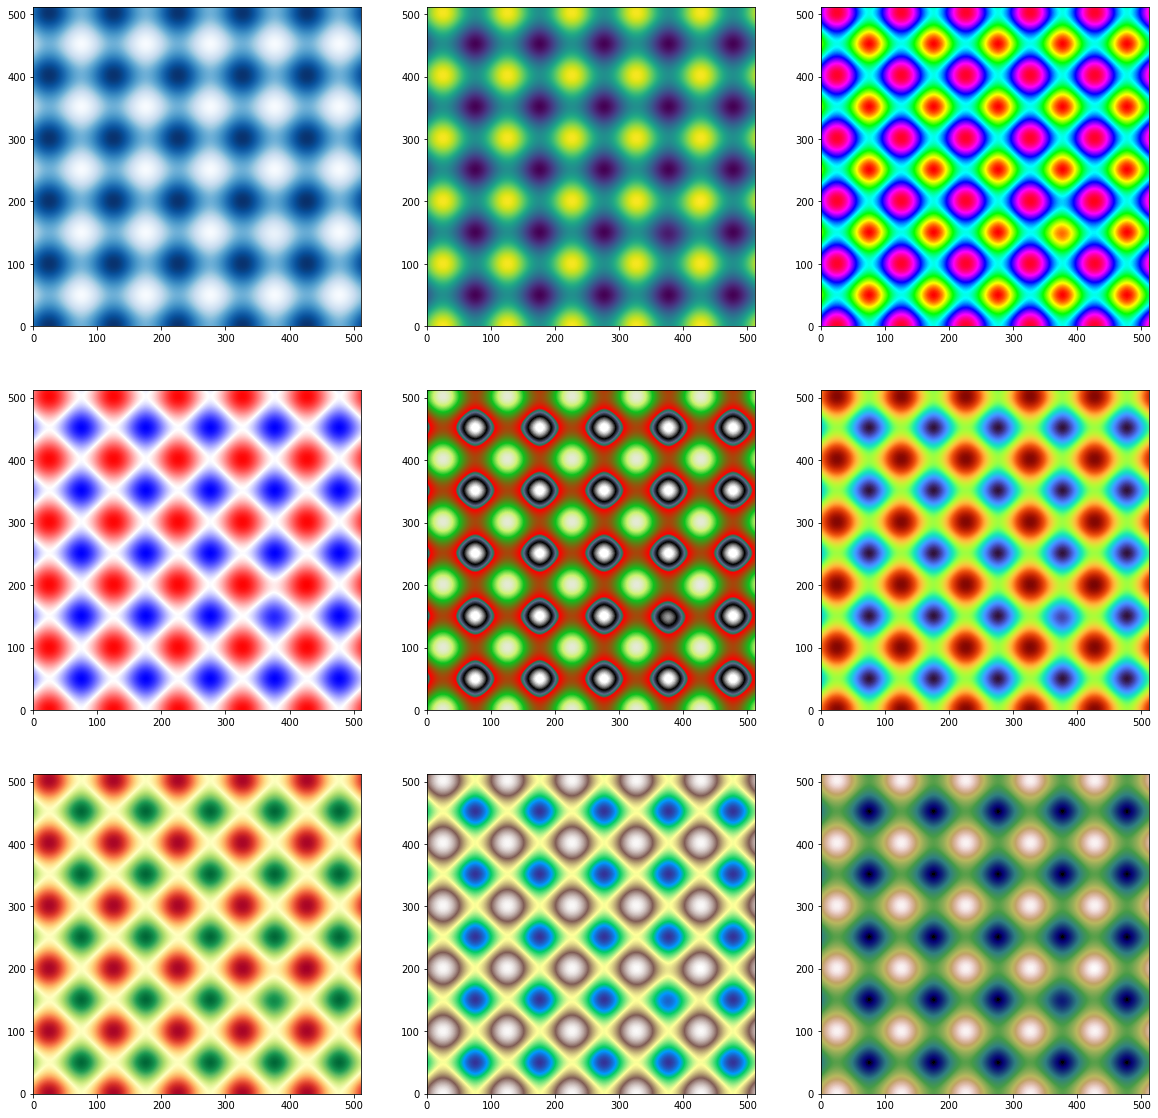

In [7]:
fig, axs = plt.subplots(3,3, figsize=(20,20))
axs[0,0].contourf(X, Y, -Z, 500, cmap = 'Blues')
axs[0,1].contourf(X, Y, -Z, 500, cmap = 'viridis')
axs[0,2].contourf(X, Y, -Z, 500, cmap = 'hsv')
axs[1,0].contourf(X, Y, -Z, 500, cmap = 'bwr')
axs[1,1].contourf(X, Y, -Z, 500, cmap = painbow)
axs[1,2].contourf(X, Y, -Z, 500, cmap = 'turbo')
axs[2,0].contourf(X, Y, -Z, 500, cmap = 'RdYlGn_r')
axs[2,1].contourf(X, Y, -Z, 500, cmap = 'terrain')
axs[2,2].contourf(X, Y, -Z, 500, cmap = 'gist_earth');